## BST 267: Introduction to Social and Biological Networks (2022)

# Homework 4


### Question 1: Implementing the G(n,m) model (2 points)

Write a function called `nm_model` that implements the G(n,m) model. Visualize one graph realization from the G(100,150) model.

<IPython.core.display.Javascript object>


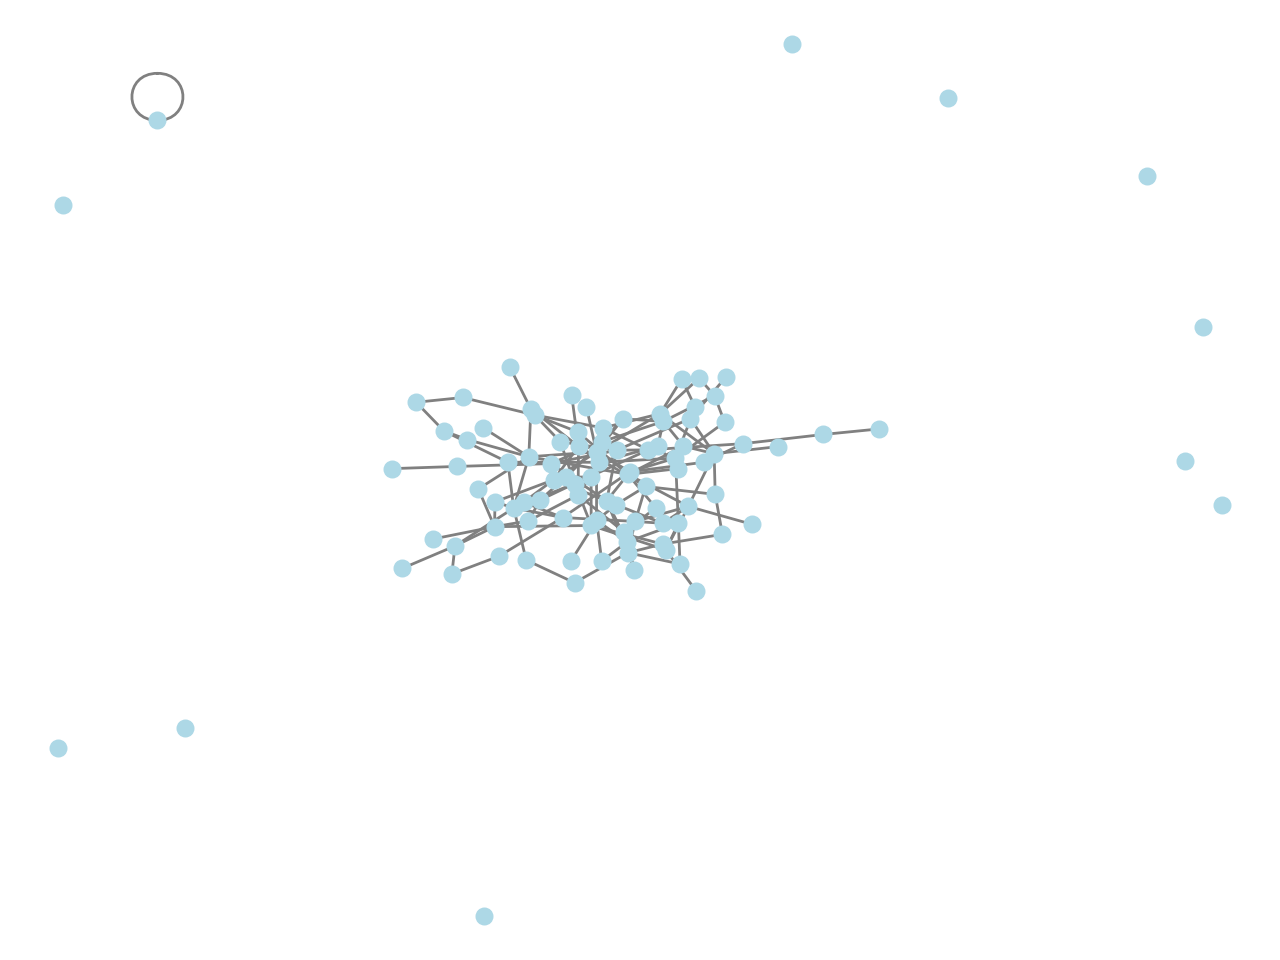

In [1]:
# ADD YOUR CODE HERE
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
def nm_model(n, m):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    # Randomly add m edges between the nodes
    for i in range(m):
        # Pick two random nodes
        node1 = random.choice(list(G.nodes))
        node2 = random.choice(list(G.nodes))
        # Add an edge between the two nodes
        G.add_edge(node1, node2)
    return G

# Visualize one graph realization from the G(100,150) model.
G = nm_model(100, 150)
nx.draw(G, node_size=30, node_color='lightblue', edge_color='gray')

### Question 2: Implementing the configuration model (2 points)

In this question you will implement your own configuration model. Write a function called `cfmodel`. The input is a degree sequence called `ds` and the output is one graph realization from the configuration model ensemble defined by the given degree sequence. Note that the configuration model can produce self-edges and multiedges, so to allow for these structures in a NetworkX graph object, you should create your graph using `nx.MultiGraph()` rather than `nx.Graph()`. The node IDs of the generated random graph should range from `0` to `n-1` for a degree sequence of length `n`. To generate a random matching of stubs, one option is to use `random.shuffle` that shuffles a list in place. Consult online documentation as needed.

In [2]:
# ADD YOUR CODE HERE
def cfmodel(ds):
    """
    Implement a configuration model, the configuration model can produce self-edges and multiedges, so to allow for these structures in a NetworkX graph object
    Input: a degree sequence called `ds` 
    Output: a graph realization from the configuration model ensemble defined by the given degree sequence.
    """
    G = nx.MultiGraph()
    G.add_nodes_from(range(len(ds)))
   
    stub = []
    for i in range(len(ds)):
        stub += [i] * ds[i]
    # Randomly add edges between the nodes
    np.random.shuffle(stub)
    for i in range(0, len(stub), 2):
        # Add an edge between the two stubs
        G.add_edge(stub[i], stub[i + 1])
     # node IDs of the generated random graph should range from 0 to n-1 for a degree sequence of length n
    return G

### Question 3: Visualization of graph realizations from the configuration model (2 points)

We are going to visualize different graph realizations from the configuration model. Write code that calls your `cfmodel` function in a `for` loop 16 times to generate 16 realizations of the configuration model that follows the degree sequence of the so-called Florentine Families network. The easiest way to create the graph is by executing `G = nx.florentine_families_graph()`. If your `cfmodel` function appears not to work, you can use the built-in version of the model in NetworkX, in which case you should consult online documentation on how to use it. Use `plt.subplot` to draw the network visualizations in a 4 rows x 4 columns figure, where each panel shows one network realization. The node layout (the x-y positions of the nodes) should be fixed across the 16 realizations; this makes it easier to confirm that the model preserves the degree sequence.

Degree Sequence of our Florentine Families network: [1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1]


<IPython.core.display.Javascript object>


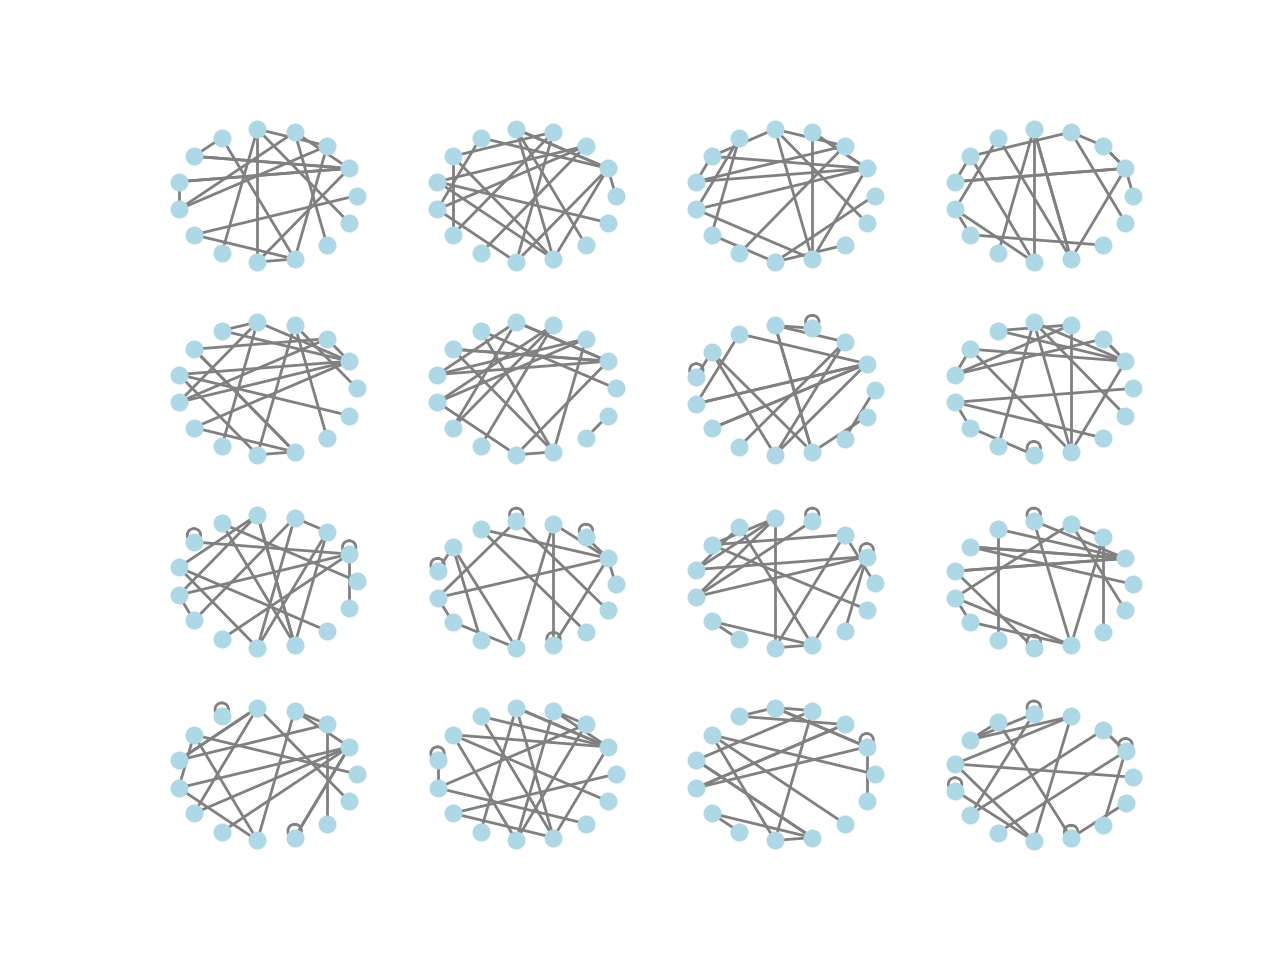

In [3]:
# ADD YOUR CODE HERE
# Visualize different graph realizations from the configuration model.

F = nx.florentine_families_graph()
ds3 = []
for i in F.nodes:
    ds3.append(F.degree(i))
print("Degree Sequence of our Florentine Families network:", ds3)

P = nx.MultiGraph()
P.add_nodes_from(range(15))
p = nx.circular_layout(P)

# Calls `cfmodel` in a `for` loop 16 times to generate 16 realizations of the configuration model 
plt.figure()
for i in range(16):
    G = cfmodel(ds3)
    plt.subplot(4, 4, i + 1)
    nx.draw(G, node_size=30, pos=p, node_color='lightblue', edge_color='gray')


### Question 4: Multiedges in the configuration model (2 points)

We discussed in Lecture 6 how the configuration model, although intended to be a model of simple networks, can generate both self-loops and multiedges. Although this is essentially a "bug" of the model, the density of both (self-loops and multiedges) decreases as the size of the network increases. Let's investigate this phenomenon for multiedges. 

Generate 10 ER graphs for each of the following number of nodes: `Ns = [10, 35, 120, 416, 1443, 5000]` (60 graphs in total). We want to fix the average degree for all graphs at 2, which means that you need to use a different value of the `p` parameter for different values of the `N` parameter. Next, extract the degree sequence of each ER graph and generate one corresponding graph realization from the configuration model (60 graphs in total). Count the number of multiedges in each graph by writing a function `count_multiedges` which takes an `nx.MultiGraph()` object as its argument and returns the number of multiedges in the graph. Make a log-log plot of the average proportion of multiedges (the number of multiedges divided by the number of edges), averaged over the 10 realizations for each value of `N`, as a function of network size `N`. 

<IPython.core.display.Javascript object>


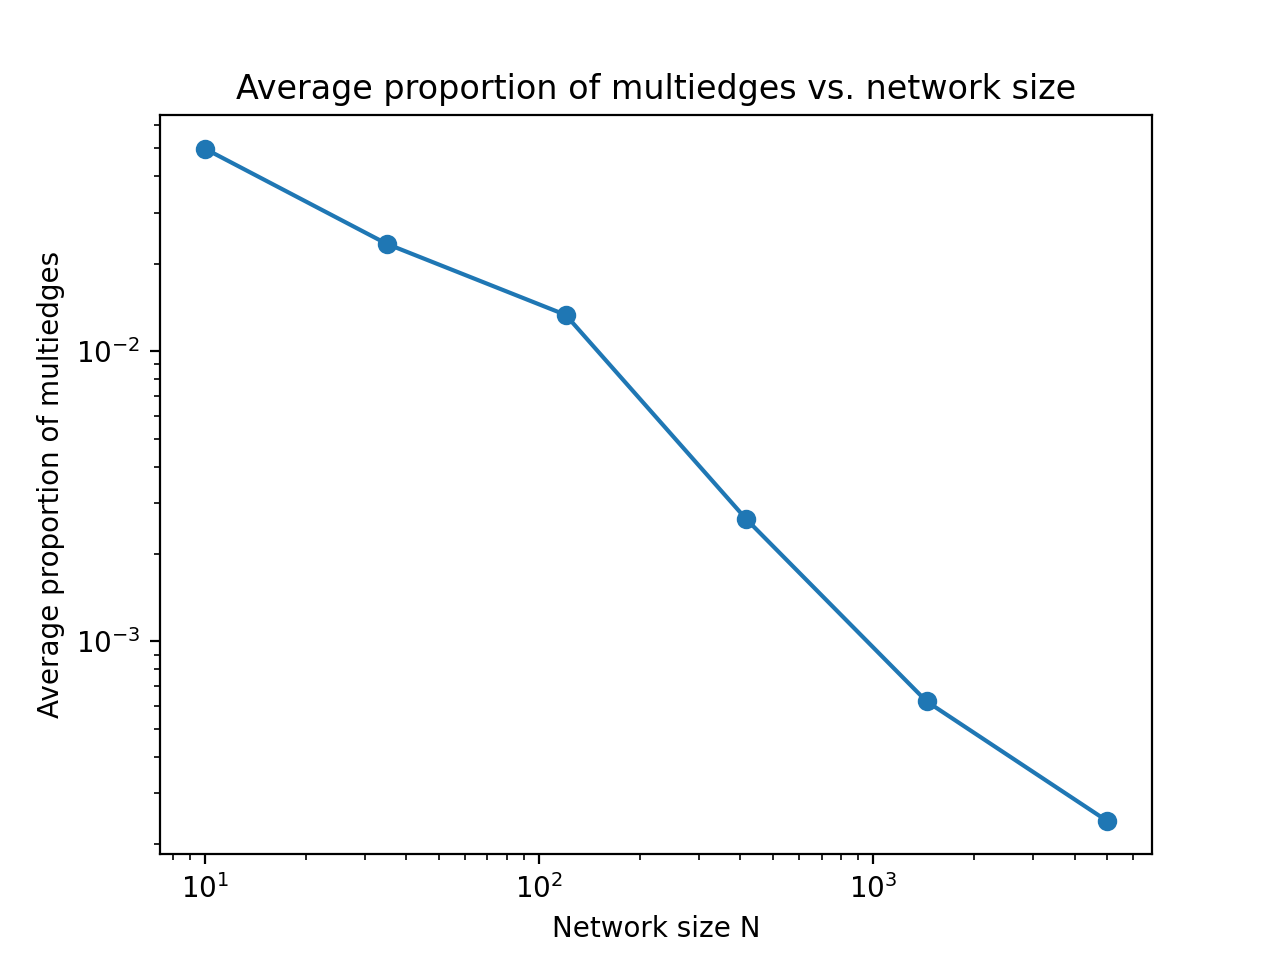

In [4]:
# ADD YOUR CODE HERE
# returns the number of multiedges in the graph.
def count_multiedges(G):
    """
    Input: a graph `G`
    Output: the number of multiedges in `G`
    """
    # ADD YOUR CODE HERE
    return len(G.edges()) - len(set(G.edges()))

# fix average degree for all graphs at 2
avg = []
# Generate 10 ER graphs for each of the following number of nodes
Ns = [10, 35, 120, 416, 1443, 5000]
for N in Ns:
    # use a different value of the `p` parameter for different values of the `N` parameter
    p = 2 / (N-1)
    proportion = []
    for i in range(10):
        G = nx.erdos_renyi_graph(N, p)
        ds4 = []
        for i in G.nodes():
            ds4.append(G.degree(i))
        # generate one corresponding graph realization from the configuration model
        realization= cfmodel(ds4)
        #Count the number of multiedges in each graph by `count_multiedges` 
        num_multiedges = count_multiedges(realization)
        # compute proportion of multiedges (the number of multiedges divided by the number of edges)
        proportion.append(num_multiedges / len(realization.edges()))
    # compute the average proportion of multiedges over the 10 graphs
    avg.append(np.mean(proportion))

# Make a log-log plot of the average proportion of multiedges
#  (the number of multiedges divided by the number of edges), 
# averaged over the 10 realizations for each value of `N`, 
# as a function of network size `N`. 
plt.figure()
plt.loglog(Ns, avg, 'o-')
plt.xlabel('Network size N')
plt.ylabel('Average proportion of multiedges')
plt.title('Average proportion of multiedges vs. network size')
plt.show()
